In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [68]:
file_path = "raw_data/Q_75_previous-1950-2023_RR-T-Vent.csv.gz"

# Read the CSV file
df_2023 = pd.read_csv(file_path, compression="gzip", sep=";")

# Display first few rows
df_2023.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,75101001,INNOCENTS,48.860667,2.348333,37,19500101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75101001,INNOCENTS,48.860667,2.348333,37,19500102,1.8,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75101001,INNOCENTS,48.860667,2.348333,37,19500103,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75101001,INNOCENTS,48.860667,2.348333,37,19500104,0.2,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75101001,INNOCENTS,48.860667,2.348333,37,19500105,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493916 entries, 0 to 493915
Data columns (total 58 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NUM_POSTE  493916 non-null  int64  
 1   NOM_USUEL  493916 non-null  object 
 2   LAT        493916 non-null  float64
 3   LON        493916 non-null  float64
 4   ALTI       493916 non-null  int64  
 5   AAAAMMJJ   493916 non-null  int64  
 6   RR         480320 non-null  float64
 7   QRR        480513 non-null  float64
 8   TN         132788 non-null  float64
 9   QTN        133076 non-null  float64
 10  HTN        47519 non-null   float64
 11  QHTN       48148 non-null   float64
 12  TX         132933 non-null  float64
 13  QTX        133222 non-null  float64
 14  HTX        47534 non-null   float64
 15  QHTX       48046 non-null   float64
 16  TM         60328 non-null   float64
 17  QTM        60338 non-null   float64
 18  TNTXM      132156 non-null  float64
 19  QTNTXM     132239 non-n

In [70]:
df_2023["NOM_USUEL"].nunique()


37

In [71]:
df_2023['NOM_USUEL'].unique()


array(['INNOCENTS', 'TOUR ST-JACQUES', 'PLANTES', 'LUXEMBOURG', 'LAENNEC',
       'CHAMP DE MARS', 'TOUR EIFFEL', 'LOUIS XVI', 'LARIBOISIERE',
       'ST-LOUIS', 'ILE DE BERCY', 'LA FAISANDERIE', 'LEO LAGRANGE',
       'ST-ANTOINE', "PORTE D'IVRY", 'SALPETRIERE', 'PARIS-MONTSOURIS',
       'OBSERVATOIRE', 'OBS. TERRASSE', 'PARIS-MONTSOURIS-DOUBLE',
       'VAUGIRARD', 'G. POMPIDOU', 'AUTEUIL', 'BAGATELLE', 'PASSY',
       'LONGCHAMP', 'BATIGNOLLES', 'MONTMARTRE', 'BUTTES CHAUMONT',
       'VILLETTE', 'HEROLD', 'BUTTES RESERV.', 'CHARONNE',
       'MENIL.RESERVOIR', 'BELLEVILLE', 'TENON', 'BELLEVILLE PARC'],
      dtype=object)

In [72]:
df_2023['date'] = pd.to_datetime(df_2023['AAAAMMJJ'], format='%Y%m%d')

In [73]:
df_2023_paris = df_2023[df_2023['NOM_USUEL'] == 'PARIS-MONTSOURIS']
df_2023_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
247253,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500101,0.0,1.0,-1.7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01
247254,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500102,1.7,1.0,-3.8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-02
247255,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500103,2.4,1.0,3.1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-03
247256,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500104,1.1,1.0,8.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-04
247257,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,19500105,2.0,1.0,6.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-05


In [75]:
df_2023_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27028 entries, 247253 to 274280
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   NUM_POSTE  27028 non-null  int64         
 1   NOM_USUEL  27028 non-null  object        
 2   LAT        27028 non-null  float64       
 3   LON        27028 non-null  float64       
 4   ALTI       27028 non-null  int64         
 5   AAAAMMJJ   27028 non-null  int64         
 6   RR         27028 non-null  float64       
 7   QRR        27028 non-null  float64       
 8   TN         27028 non-null  float64       
 9   QTN        27028 non-null  float64       
 10  HTN        14607 non-null  float64       
 11  QHTN       14611 non-null  float64       
 12  TX         27028 non-null  float64       
 13  QTX        27028 non-null  float64       
 14  HTX        14609 non-null  float64       
 15  QHTX       14610 non-null  float64       
 16  TM         27028 non-null  float64

In [82]:
df_2010_paris = df_2023_paris[df_2023_paris['date'] >= '2010-01-01']
df_2010_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
269168,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100101,0.0,1.0,0.2,1.0,...,NaN,12.2,1.0,NaN,NaN,1610.0,9.0,45.0,9.0,2010-01-01
269169,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100102,0.0,1.0,-1.2,1.0,...,NaN,8.6,1.0,NaN,NaN,1250.0,9.0,7.0,9.0,2010-01-02
269170,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100103,0.0,1.0,-1.3,1.0,...,NaN,8.2,1.0,NaN,NaN,1935.0,9.0,0.0,9.0,2010-01-03
269171,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100104,0.0,1.0,-6.0,1.0,...,NaN,7.8,1.0,NaN,NaN,41.0,9.0,0.0,9.0,2010-01-04
269172,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20100105,0.0,1.0,-3.7,1.0,...,NaN,4.8,1.0,NaN,NaN,1610.0,9.0,0.0,9.0,2010-01-05


In [83]:
# List of selected necessary columns for LSTM model
necessary_columns = [
     'AAAAMMJJ',
     'TN', 'TX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL',
     'date'
]

# Selecting the columns from your DataFrame
df_2010_paris = df_2010_paris[necessary_columns]

# Display the first few rows to verify
df_2010_paris.head()


,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date
269168,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01
269169,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02
269170,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03
269171,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04
269172,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05


In [90]:
df_2010_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5113 entries, 269168 to 274280
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5113 non-null   int64         
 1   TN        5113 non-null   float64       
 2   TX        5113 non-null   float64       
 3   TM        5113 non-null   float64       
 4   TNTXM     5113 non-null   float64       
 5   TAMPLI    5113 non-null   float64       
 6   TNSOL     5109 non-null   float64       
 7   date      5113 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 359.5 KB


In [84]:
file_path = "raw_data/Q_75_latest-2024-2025_RR-T-Vent.csv.gz"

# Read the CSV file
df_2024 = pd.read_csv(file_path, compression="gzip", sep=";")

# Display first few rows
df_2024.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,75106001,LUXEMBOURG,48.844667,2.333833,46,20240101,9.6,1.0,6.8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,20240102,7.1,1.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,20240103,3.2,1.0,10.4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,20240104,0.2,1.0,8.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,20240105,0.2,1.0,6.7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_2024['date'] = pd.to_datetime(df_2024['AAAAMMJJ'], format='%Y%m%d')

In [86]:
df_2024_paris = df_2024[df_2024['NOM_USUEL'] == 'PARIS-MONTSOURIS']
df_2024_paris.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
1362,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240101,10.7,1.0,6.1,1.0,...,NaN,15.4,1.0,NaN,NaN,2253.0,9.0,647.0,9.0,2024-01-01
1363,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240102,8.0,1.0,9.0,1.0,...,NaN,21.9,1.0,NaN,NaN,1415.0,9.0,692.0,9.0,2024-01-02
1364,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240103,4.4,1.0,10.1,1.0,...,NaN,18.8,1.0,NaN,NaN,1310.0,9.0,265.0,9.0,2024-01-03
1365,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240104,0.0,1.0,7.5,1.0,...,NaN,13.6,1.0,NaN,NaN,2100.0,9.0,18.0,9.0,2024-01-04
1366,75114001,PARIS-MONTSOURIS,48.821667,2.337833,75,20240105,0.0,1.0,6.1,1.0,...,NaN,16.9,1.0,NaN,NaN,118.0,9.0,39.0,9.0,2024-01-05


In [87]:
necessary_columns = [
     'AAAAMMJJ',
     'TN', 'TX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL',
     'date'
]

# Selecting the columns from your DataFrame
df_2024_paris = df_2024_paris[necessary_columns]

# Display the first few rows to verify
df_2024_paris.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date
1362,20240101,6.1,11.1,8.4,8.6,5.0,4.0,2024-01-01
1363,20240102,9.0,12.1,11.0,10.6,3.1,8.0,2024-01-02
1364,20240103,10.1,12.7,10.6,11.4,2.6,7.8,2024-01-03
1365,20240104,7.5,11.1,9.7,9.3,3.6,5.0,2024-01-04
1366,20240105,6.1,9.7,7.6,7.9,3.6,3.0,2024-01-05


In [89]:
df_2024_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1362 to 1815
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  454 non-null    int64         
 1   TN        454 non-null    float64       
 2   TX        454 non-null    float64       
 3   TM        454 non-null    float64       
 4   TNTXM     454 non-null    float64       
 5   TAMPLI    454 non-null    float64       
 6   TNSOL     454 non-null    float64       
 7   date      454 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 31.9 KB


In [92]:
df_combined_paris = pd.concat([df_2010_paris, df_2024_paris], ignore_index=True)

In [93]:
df_combined_paris.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date
0,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01
1,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02
2,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03
3,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04
4,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05


In [94]:
df_combined_paris.tail()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date
5562,20250325,8.1,14.8,11.0,11.5,6.7,7.7,2025-03-25
5563,20250326,9.6,15.7,10.9,12.7,6.1,6.6,2025-03-26
5564,20250327,5.2,17.2,11.1,11.2,12.0,-0.3,2025-03-27
5565,20250328,5.3,13.6,9.3,9.5,8.3,1.4,2025-03-28
5566,20250329,7.5,14.4,10.5,11.0,6.9,4.2,2025-03-29


In [95]:
df_combined_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5567 non-null   int64         
 1   TN        5567 non-null   float64       
 2   TX        5567 non-null   float64       
 3   TM        5567 non-null   float64       
 4   TNTXM     5567 non-null   float64       
 5   TAMPLI    5567 non-null   float64       
 6   TNSOL     5563 non-null   float64       
 7   date      5567 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 348.1 KB


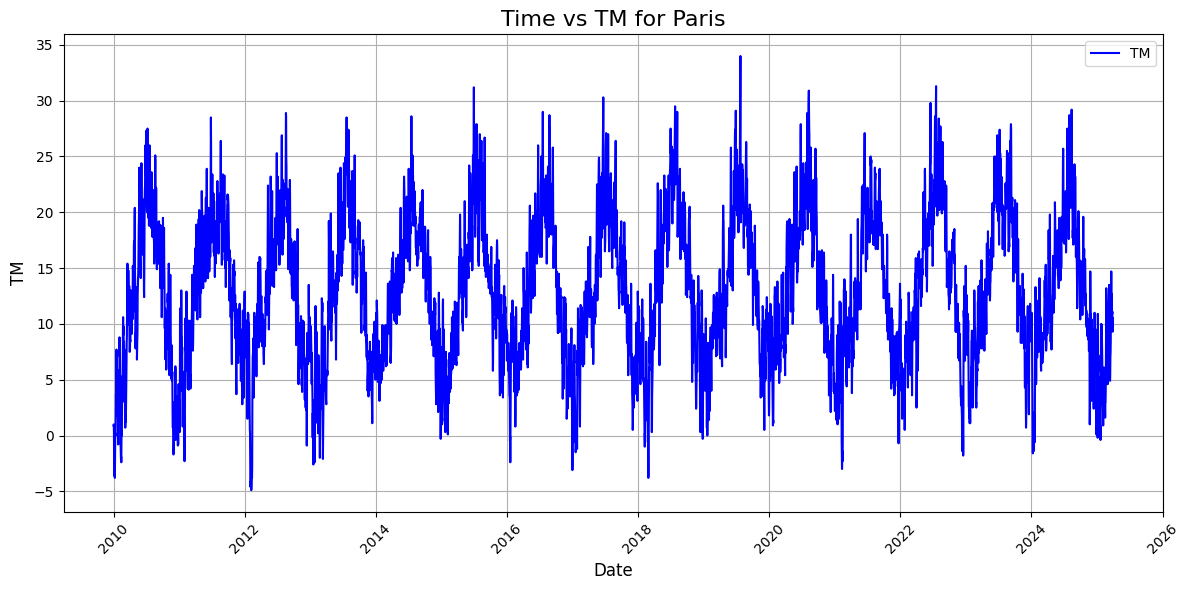

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined_paris['date'], df_combined_paris['TM'], color='blue', label='TM')
plt.title('Time vs TM for Paris', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('TM', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
df_combined_paris['TNSOL'].fillna(df_combined_paris['TNSOL'].median(), inplace=True)


In [98]:
df_combined_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AAAAMMJJ  5567 non-null   int64         
 1   TN        5567 non-null   float64       
 2   TX        5567 non-null   float64       
 3   TM        5567 non-null   float64       
 4   TNTXM     5567 non-null   float64       
 5   TAMPLI    5567 non-null   float64       
 6   TNSOL     5567 non-null   float64       
 7   date      5567 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 348.1 KB


In [99]:
df = df_combined_paris

In [102]:
import pickle

# Assuming 'df' is your DataFrame
pickle_file_path = 'raw_data/df_paris.pkl'

# Save the DataFrame as a pickle file
df.to_pickle(pickle_file_path)

# Check if it's saved correctly
print(f"Data saved as pickle file at: {pickle_file_path}")


Data saved as pickle file at: raw_data/df_paris.pkl


In [103]:
pickle_file_path = 'raw_data/df_paris.pkl'

# Load the DataFrame from the pickle file
df_paris = pd.read_pickle(pickle_file_path)

In [104]:
df_paris.head()

,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,date
0,20100101,0.2,1.5,0.9,0.9,1.3,-0.4,2010-01-01
1,20100102,-1.2,3.6,1.0,1.2,4.8,-4.2,2010-01-02
2,20100103,-1.3,4.7,0.2,1.7,6.0,-4.1,2010-01-03
3,20100104,-6.0,-1.1,-3.6,-3.6,4.9,-7.6,2010-01-04
4,20100105,-3.7,0.4,-2.2,-1.7,4.1,-6.3,2010-01-05
